In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
import matplotlib.pyplot as plt

<h1>TASK1</h1>

<p>1. Реализовать усреднение зашумленного сигнала по формуле 1. Результат усреднения представлен
на рис.1. Вывести спектр усредненного и зашумленного сигнала. Объяснить результат.</p>

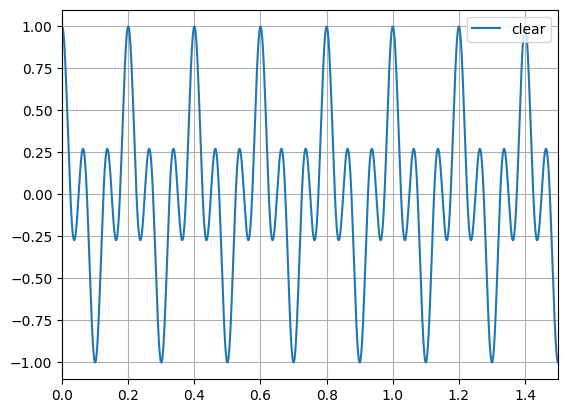

In [80]:
import random as rm
def noise(x):
    a = 1
    if rm.random() >= 0.5:
        return a*rm.random()
    else:
        return -a*rm.random() 


fnoise = np.vectorize(noise)

N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1.0/fmax 
f = 5

xf = np.linspace(0.0, N/fmax, N)

y = (np.cos(f * 2.0*np.pi*xf) +  np.cos(3*f * 2.0*np.pi*xf)) #+ fnoise(xf)
y = y/np.max(y)
plt.plot(xf,y, label= 'clear')
plt.xlim(0, 1.5)
plt.legend()
plt.grid()




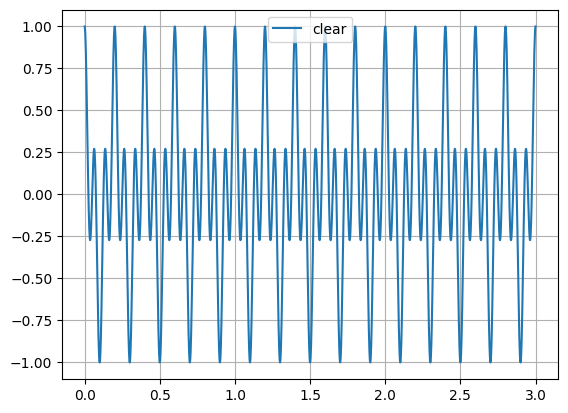

In [81]:
def meaner (xf,k):
    sum = 0
    for i in range(len(xf)):
        sum+= xf[i]
    y = sum / (2*k+1)
    return y

meansig = np.vectorize(meaner)

k = 0

ymean = np.array([])
for i in range(N):
    imin = i - k
    imax = i + k
    if imin < 0:
        imin = 0
    if imax > N-1:
        imax = N-1
    sum = 0
    for j in range(imin,imax+1):
        sum+= y[j]
    yn = sum / (2*k+1)
    ymean = np.append(ymean, yn)
ymean = ymean/np.max(ymean)
plt.plot(xf,ymean, label= 'clear')
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()

<h1>TASK2</h1>

<p>2. Реализовать усреднение зашумленного сигнала по формуле 2. Результат усреднения представлен
на рис.2. Вывести спектр усредненного и зашумленного сигнала. Сопоставить усреднение по
Гауссу и среднему значению, как это сделано на рис.2. Объяснить результат.</p>

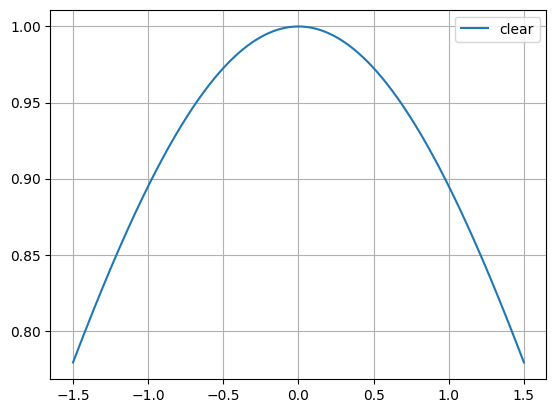

In [82]:
def gauss(x,w):
    grad = (-4)* np.log(2) * (x**2)
    grad = grad / (w**2)
    return np.exp(grad)

fgauss = np.vectorize(gauss)

xg = np.linspace(-N/(2*fmax), N/(2*fmax), N)

yg = fgauss(xg,5)

plt.plot(xg,yg, label= 'clear')
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()

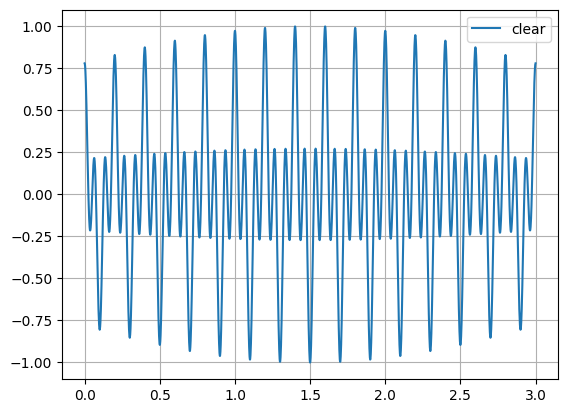

In [83]:
ymg = np.array([])
for i in range(N):
    imin = i - k
    imax = i + k
    if imin < 0:
        imin = 0
    if imax > N-1:
        imax = N-1
    sum = 0
    for j in range(imin,imax+1):
        sum+= y[j]*yg[j]
    yn = sum
    ymg = np.append(ymg, yn)
ymg = ymg/np.max(ymg)

plt.plot(xf,ymg, label= 'clear')
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()

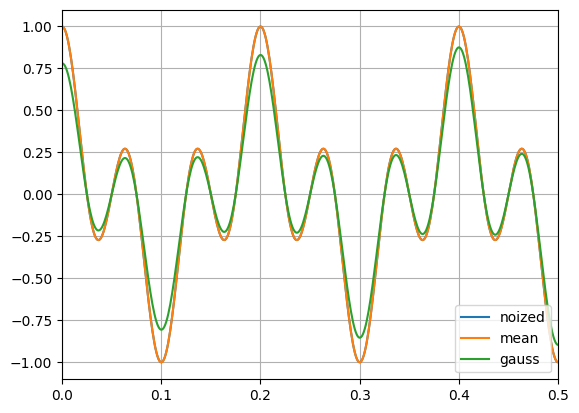

In [84]:
plt.plot(xf,y, label= 'noized')
plt.plot(xf,ymean, label= 'mean')
plt.plot(xf,ymg, label= 'gauss')
plt.xlim(0, 0.5)
plt.legend()
plt.grid()

<h1>TASK3</h1>

<p>3. Воспользоваться усреднением по Гауссу для обработки сигнала, состоящего из всплесков пиков.
Всплеск каждого пика является случайно величиной. Амплитуда каждого пика A=1 V, рис.3.</p>

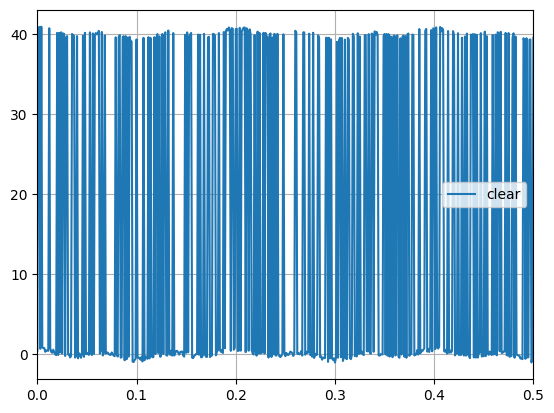

In [59]:
def spike(y, V):
    if rm.random() >= 0.6: #and y >= 0:
        y+=V
    return y

spike_noise = np.vectorize(spike) 

N = 10000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1.0/fmax 
f = 5
V = 40

xf = np.linspace(0.0, N/fmax, N)

ys = (np.cos(f * 2.0*np.pi*xf) +  np.cos(3*f * 2.0*np.pi*xf)) +  fnoise(xf)
ys = ys/np.max(ys)
ys = spike_noise(ys,V)

plt.plot(xf,ys, label= 'clear')
plt.xlim(0, 0.5)
plt.legend()
plt.grid()


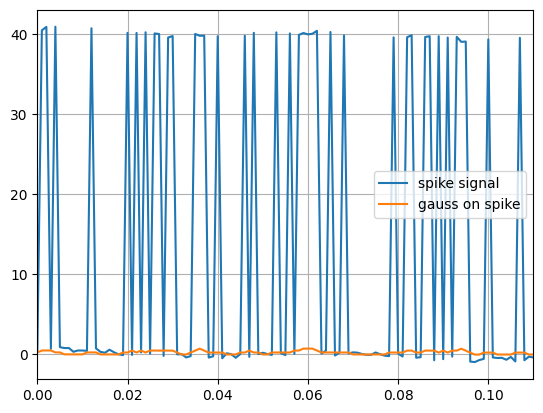

In [64]:
ymsg = np.array([])

xg = np.linspace(-N/(2*fmax), N/(2*fmax), N)
yg = fgauss(xg,15)
k = 1
for i in range(N):
    imin = i - k
    imax = i + k
    if imin < 0:
        imin = 0
    if imax > N-1:
        imax = N-1
    sum = 0
    for j in range(imin,imax+1):
        sum+= ys[j]*yg[j]
    yn = sum
    ymsg = np.append(ymsg, yn)
ymsg = ymsg/np.max(ymsg)

plt.plot(xf,ys, label= 'spike signal')
plt.plot(xf,ymsg, label= 'gauss on spike')
plt.xlim(0, 0.11)
plt.legend()
plt.grid()

<h1>TASK4</h1>

<p>4. Реализовать медианный фильтр для очистки сигнала от случайных всплесков в сигнала. В этом
случае амплитуда всплеска сигнала уже не является постоянной и является случайной величиной.
Результат обработки представлен оранжевой линий на рис. 4.

Замечание: Реализовать фильтрацию лучше в два этапа. Вначале ввести порог, выше которого пик будет
удаляться, затем применить медианный фильтр.</p>

In [67]:
median = np.median(ys)
mean = np.mean(ys)
print('median =', median)
print('mean =', mean)

median = 0.36946565546290855
mean = 15.81168647417648


In [68]:
def meds(y, tsh, median):
    if y >= tsh:
        y = median
    return y

median_filter = np.vectorize(meds)

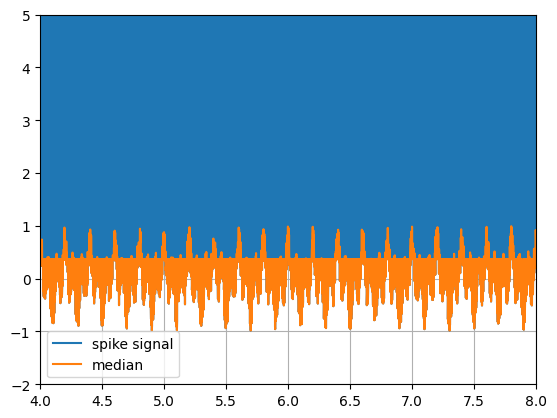

In [69]:
ymed = median_filter(ys, 1.0, median)

plt.plot(xf,ys, label= 'spike signal')
plt.plot(xf,ymed, label= 'median')
plt.xlim(4, 8)
plt.ylim(-2,5)
plt.legend()
plt.grid()

<h1>TASK5</h1>

<p>5. Метод спектральной интерполяции сигналов.

Данный метод позволяет восстановить часть сигнала, которая была потеряна или удален

Алгоритм реализации метода:

- определить сигнал в заданном временном промежутке, например от 0 до 10 сек.

- удалить из сигнала данные в диапазоне от 5 до 7 секунд.

задать размер окна по временной области для которых будет определяться спектр. Размер окон
для правой и левой части должны совпадать.

определить спектр сигнала до разрыва и после разрыва.

осуществить усреднение спектров сигналов в правой и левой области.

с помощью обратного преобразования Фурье восстановить утерянную часть сигнала.

сшить границы с помощью линейной интерполяции.

Результат работы алгоритма представлен на Рис.5а.</p>

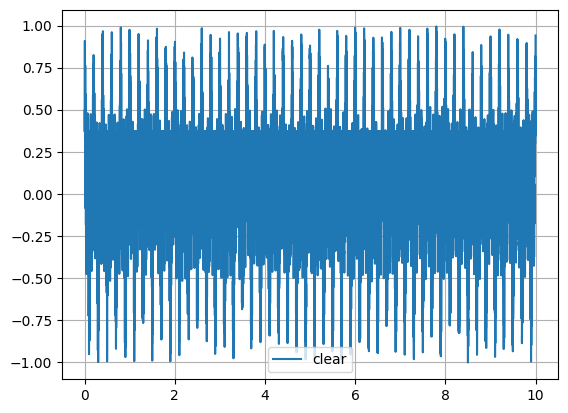

In [70]:
N = 10000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1.0/fmax 
f = 5

x = np.linspace(0.0, N/fmax, N)

#sig = (np.cos(f * 2.0*np.pi*x) +  np.cos(3*f * 2.0*np.pi*x))
sig = ymed

plt.plot(x,sig, label= 'clear')
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()


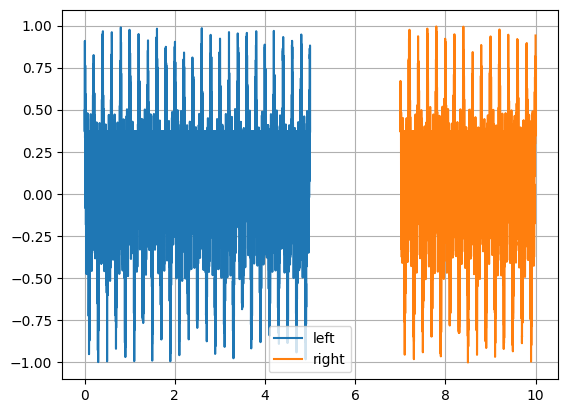

In [71]:
sigfirst = sig[:5*fmax]
sigscnd = sig[7*fmax:]

plt.plot(x[:5*fmax],sigfirst, label= 'left')
plt.plot(x[7*fmax:],sigscnd, label= 'right')
#plt.xlim(0, 1.5)
plt.legend()
plt.grid()

Text(0, 0.5, 'Амплитуда')

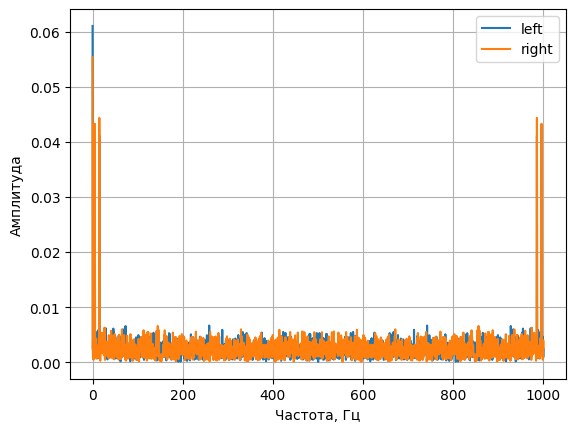

In [72]:
winsize = 2

leftwin = sigfirst[(5-winsize)*fmax:]
rightwin = sigscnd[:(winsize)*fmax]

leftff = fft(leftwin)
rightff = fft(rightwin)

xf = np.linspace(0.0, fmax, winsize*fmax)

plt.plot(xf, 2.0/N * np.abs(leftff), label= 'left')
plt.plot(xf, 2.0/N * np.abs(rightff), label= 'right')
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

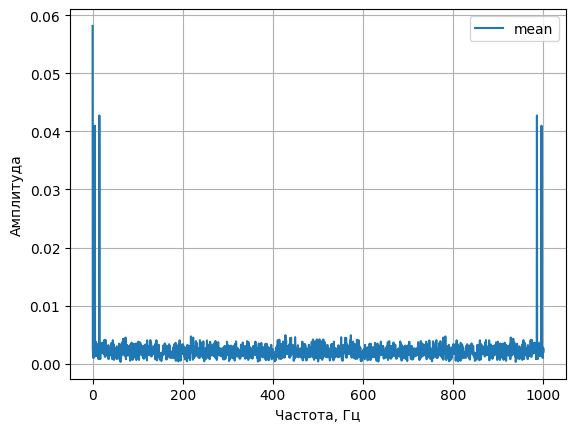

In [73]:
meanff = np.sqrt(leftff*rightff)
plt.plot(xf, 2.0/N * np.abs(meanff), label= 'mean')
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

0.15210628116742306
0.14349399596851542
0.14780013856796925
(0.14535818276358395+4.930380657631324e-35j)


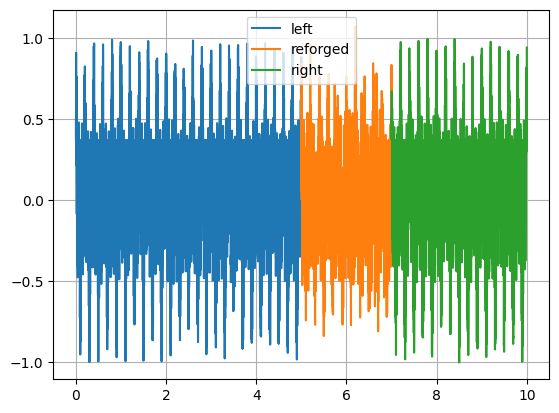

In [74]:
siglost = ifft(meanff)
leftmean = np.mean(sigfirst)
print(leftmean)
rightmean = np.mean(sigscnd)
print(rightmean)
sigmean = (leftmean+rightmean)/2
print(sigmean)
mean = np.mean(siglost)
print(mean)
siglost = siglost - (mean)
#siglost = siglost/np.max(siglost)
xlost = x[5*fmax+1:7*fmax]

sigfirst = sig[:5*fmax]
sigscnd = sig[7*fmax:]

plt.plot(x[:5*fmax],sigfirst, label= 'left')
plt.plot(xlost,siglost[1:], label= 'reforged')
plt.plot(x[7*fmax:],sigscnd, label= 'right')
#plt.xlim(4, 6)
plt.legend()
plt.grid()

<h1>TASK6</h1>

<p>6. Алгоритм понижения/повышения дискретности сигнала в N раз.

Понижение дискретности сигнала можно осуществить двумя методами:

(а) уменьшением числа точек в сигнале в N раз (неправильный). Замечание: для увеличения
дискретности сигнала данным способом можно воспользоваться и он будет правильным.

(б) уменьшением дискретности сигнала в N раз (правильный) с помощью определения новой частоты
Найквиста, которая будет соответствовать новой дискретности сигнала.

Понижение дискретности сигнала осуществляется в три этапа, рис. 6. В качестве исходного сигнала
можно выбрать сигнал косинуса с двумя частотами, например, 50 и 100 Гц.</p>

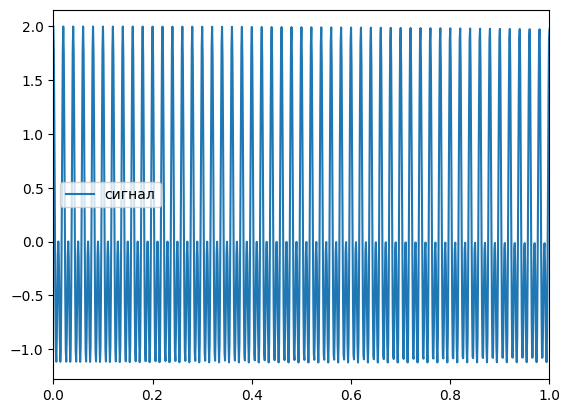

In [17]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1.0/fmax 
f = 50

nyquist = fmax/2 #частота Найквиста

x = np.linspace(0.0, N/fmax, N)
sig = (np.cos(f * 2.0*np.pi*x) +  np.cos(2*f * 2.0*np.pi*x))

spectr = fft(sig)
spectr = spectr/np.max(spectr)
xf = np.linspace(0,fmax,N)

plt.plot(x,sig, label= 'сигнал')
plt.xlim(0,1)
plt.legend()

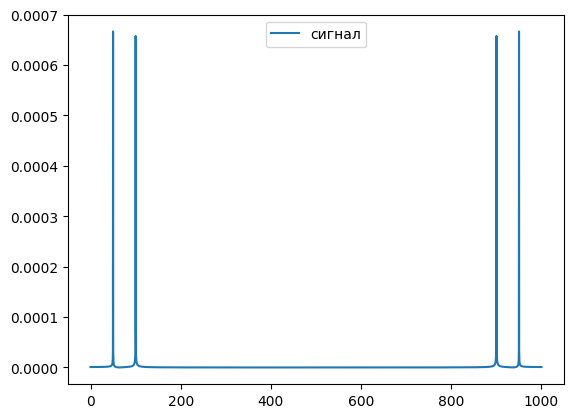

In [18]:
plt.plot(xf, 2.0/N * np.abs(spectr), label= 'сигнал')
#plt.xlim(0,1)
plt.legend()

In [19]:
def filterlow(w,wc):
    flt = (wc**2)/(-w**2 + 1j*np.sqrt(2)*wc*w + wc**2)
    return flt    

flt = np.vectorize(filterlow)

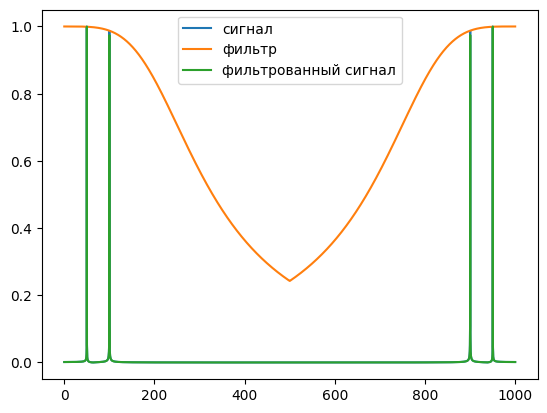

In [20]:
newnyquist = nyquist/2
yf = flt(xf,newnyquist)
yf = yf[:int(N/2)]
yf2 = np.flip(yf)
spectrflt = np.concatenate((yf, yf2), axis=None)
spectrflt = spectrflt/np.max(spectrflt)
newspectr = spectr * spectrflt
plt.plot(xf, np.abs(spectr), label= 'сигнал')
plt.plot(xf, np.abs(spectrflt), label= 'фильтр')
plt.plot(xf, np.abs(newspectr), label= 'фильтрованный сигнал')
#plt.xlim(0,1)
plt.legend()

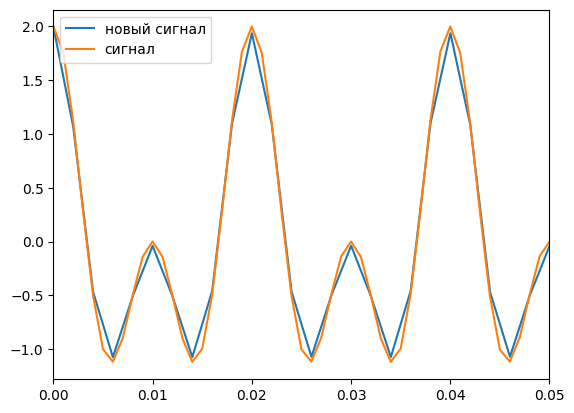

In [21]:
newsig = ifft(newspectr)
newsig = newsig/np.max(newsig)*2
newsig = newsig[0:N:2]
xnew = np.linspace(0.0, N/fmax, int(N/2))
plt.plot(xnew,newsig, label= 'новый сигнал')
plt.plot(x,sig, label= 'сигнал')
plt.xlim(0,0.05)
plt.legend()

<h1>TASK7</h1>

<p>7. В результате записи сигналов с 3-х различных датчиков были записаны данные с различной частотой
дискретизации, рис 7 (а). Привести все сигналы к единой частоте дискретизации, как представлено на
рис. 7 (б). В качестве сигналов можно выбрать три косинуса с различной частотой дискретизации,
например 10, 35 и 80 Гц.</p>

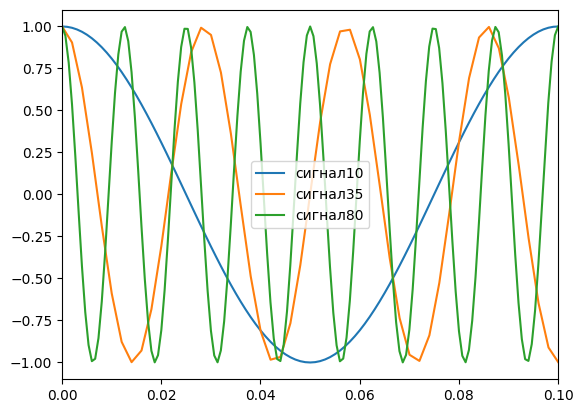

In [22]:
N1 = 3000 # Количество отсчетов
N2 = 1500
N3 = 4500
fmax1 = 1000 # максимальная частота
fmax2 = 500
fmax3 = 1500
f1 = 10
f2 = 35
f3 = 80

nq1 = fmax1/2 #частота Найквиста
nq2 = fmax2/2
nq3 = fmax3/2

x1 = np.linspace(0.0, N1/fmax1, N1)
x2 = np.linspace(0.0, N2/fmax2, N2)
x3 = np.linspace(0.0, N3/fmax3, N3)
sig1 = np.cos(f1 * 2.0*np.pi*x1)
sig2 = np.cos(f2 * 2.0*np.pi*x2)
sig3 = np.cos(f3 * 2.0*np.pi*x3)

plt.plot(x1,sig1, label= 'сигнал10')
plt.plot(x2,sig2, label= 'сигнал35')
plt.plot(x3,sig3, label= 'сигнал80')
plt.xlim(0,0.1)
plt.legend()
plt.show()

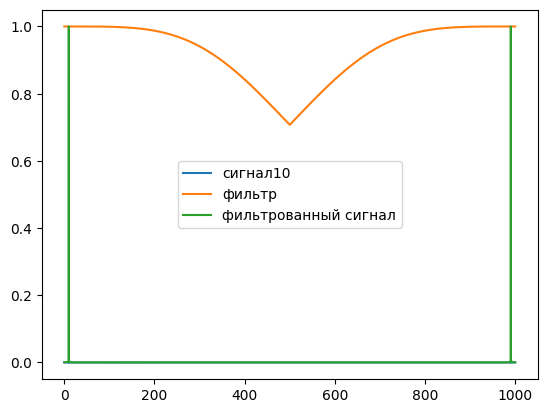

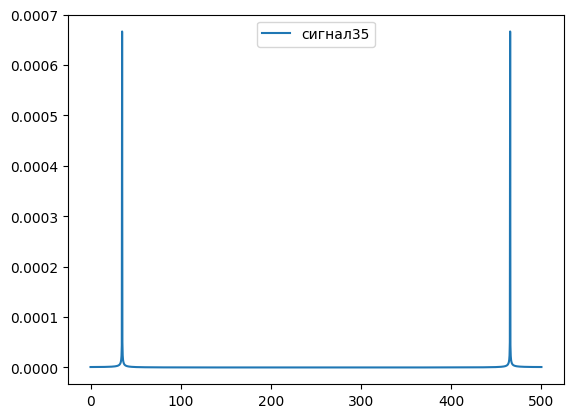

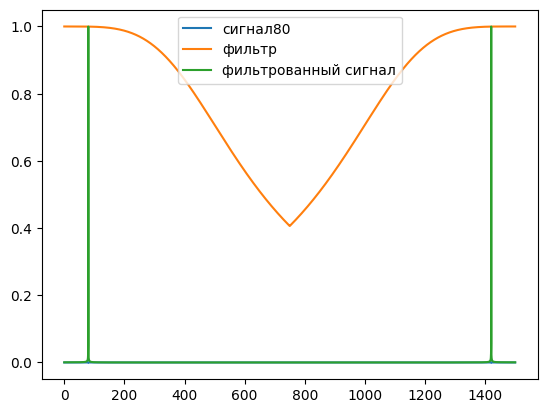

In [23]:
newnq = nq1

spectr1 = fft(sig1)
spectr1 = spectr1/np.max(spectr1)
xf1 = np.linspace(0,fmax1,N1)

spectr2 = fft(sig2)
spectr2 = spectr2/np.max(spectr2)
xf2 = np.linspace(0,fmax2,N2)

spectr3 = fft(sig3)
spectr3 = spectr3/np.max(spectr3)
xf3 = np.linspace(0,fmax3,N3)

yf = flt(xf1,newnq)
yf = yf[:int(N1/2)]
yf2 = np.flip(yf)
spectrflt = np.concatenate((yf, yf2), axis=None)
spectrflt1 = spectrflt/np.max(spectrflt)
newspectr1 = spectr1 * spectrflt1


yf = flt(xf3,newnq)
yf = yf[:int(N3/2)]
yf2 = np.flip(yf)
spectrflt = np.concatenate((yf, yf2), axis=None)
spectrflt3 = spectrflt/np.max(spectrflt)
newspectr3 = spectr3 * spectrflt3

plt.plot(xf1, 2.0/N * np.abs(spectr1), label= 'сигнал10')
plt.plot(xf1, np.abs(spectrflt1), label= 'фильтр')
plt.plot(xf1, np.abs(newspectr1), label= 'фильтрованный сигнал')
plt.legend()
plt.show()
plt.plot(xf2, 2.0/N * np.abs(spectr2), label= 'сигнал35')
plt.legend()
plt.show()
plt.plot(xf3, 2.0/N * np.abs(spectr3), label= 'сигнал80')
plt.plot(xf3, np.abs(spectrflt3), label= 'фильтр')
plt.plot(xf3, np.abs(newspectr3), label= 'фильтрованный сигнал')
plt.legend()
plt.show()


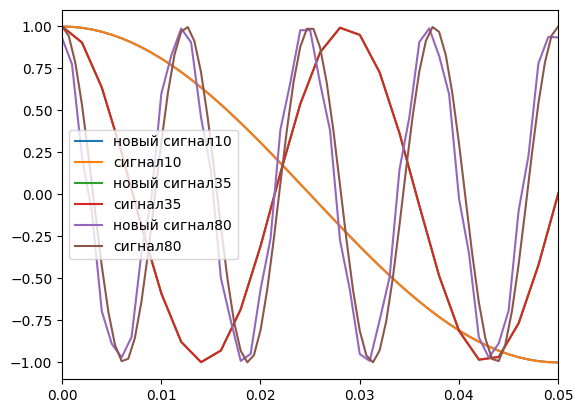

In [24]:

newsig1 = ifft(newspectr1)
newsig1 = newsig1/np.max(newsig1)

newsig2 = np.array([])
for i in range(N1):    
    if i % 2 == 0:
        newsig2 = np.append(newsig2,sig2[int(i/2)])
    else:
        if (i+1)/2 != N2:
            newdot = sig2[int((i-1)/2)] + (sig2[int((i+1)/2)] - sig2[int((i-1)/2)])/2
        else: 
            newdot = sig2[int((i-1)/2)]
        newsig2 = np.append(newsig2,newdot)

newsig3 = np.array([])
isig3 = ifft(newspectr3)
isig3 = isig3/np.max(isig3)
for i in range(N3):
    if i%3 != 0:
        newsig3 = np.append(newsig3,isig3[i])
        

xnew = x1
plt.plot(xnew,newsig1, label= 'новый сигнал10')
plt.plot(x1,sig1, label= 'сигнал10')
plt.plot(xnew,newsig2, label= 'новый сигнал35')
plt.plot(x2,sig2, label= 'сигнал35')
plt.plot(xnew,newsig3, label= 'новый сигнал80')
plt.plot(x3,sig3, label= 'сигнал80')
plt.xlim(0,0.05)
plt.legend()